In [1]:
from helpers import * 
from processor import *

from rel import * 

from boundary_cycle import *

from canonical_order import * 

from four_complete import *

from graph_checks import *

In [2]:
G_st = st_graph(seed=1) #  doesnt help when refresh.. 
p = Processor(G_st)
p.augment()
p.fix_separating_triangles()
# p.run()
# pos = plot_planar(p.G, p.embed)

ic| cut_vertices: [7, 0]
ic| tri.target_edge: (2, 3)
ic| 'neither same'
ic| len(l3_cycles): 8, m: 16, n: 9, m - n + 1: 8


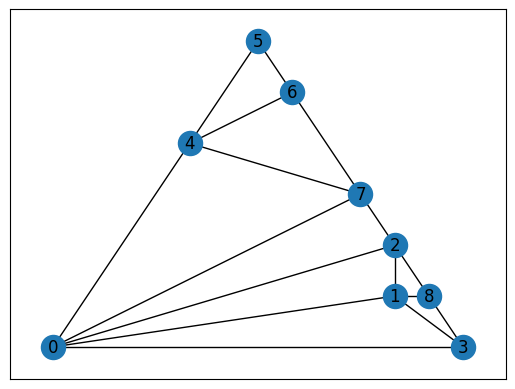

In [3]:
pos = plot_planar(p.data.G, p.data.embed)

In [4]:
is_triangulated(p.data.G)

ic| f"{c} is not chordal, checking if all share neighbour": '[0, 3, 8, 2] is not chordal, checking if all share neighbour'


True

In [5]:
nx.is_chordal(p.data.G)

False

In [6]:
def find_lists_with_unique_numbers(list_of_lists):
    unique_lists = []
    for sublist in list_of_lists:
        if len(sublist) == len(set(sublist)):
            unique_lists.append(sublist)
    return unique_lists

In [7]:
four_cycles = []
for ix, c in enumerate(nx.simple_cycles(G=p.data.G, length_bound=4)):
    if len(c) == 4:
        four_cycles.append(c)
        induced_graph = p.data.G.subgraph(c)
        ic(c, nx.is_chordal(induced_graph))
        # ic(c)


ic| c: [0, 1, 2, 7], nx.is_chordal(induced_graph): True
ic| c: [0, 1, 8, 2], nx.is_chordal(induced_graph): True
ic|

 c: [0, 1, 8, 3], nx.is_chordal(induced_graph): True
ic| c: [0, 3, 1, 2], nx.is_chordal(induced_graph): True
ic| c: [0, 3, 8, 2], nx.is_chordal(induced_graph): False
ic| c: [0, 2, 7, 4], nx.is_chordal(induced_graph): True
ic| c: [0, 7, 6, 4], nx.is_chordal(induced_graph): True
ic| c: [4, 5, 6, 7], nx.is_chordal(induced_graph): True
ic| c: [8, 2, 1, 3], nx.is_chordal(induced_graph): True


In [8]:
temp = [0, 2, 3, 4]

nbs = []
for node in temp:
    nb = set(p.data.G.neighbors(node))
    nbs.append(nb)
    ic(node, nb)

if set.intersection(*nbs):
    ic(True)


ic| node: 0, nb: {1, 2, 3, 4, 7}
ic| node: 2, nb: {0, 1, 8, 7}
ic| node: 3, nb: {0, 1, 8}
ic| node: 4, nb: {0, 5, 6, 7}


False

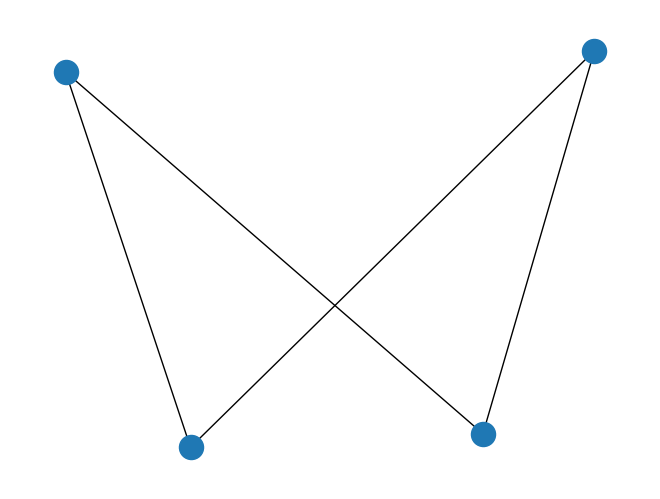

In [9]:
induced_graph = p.data.G.subgraph([0, 2, 3, 8])
nx.draw(induced_graph)
nx.is_chordal(induced_graph)

In [10]:
f = FourComplete(p.data)
f.run()


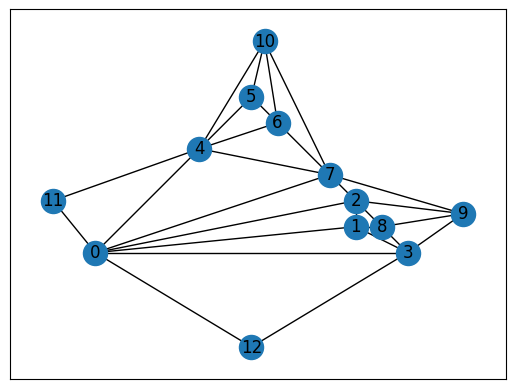

In [11]:
f.show_updated_graph()

In [12]:
is_triangulated(f.G)

ic| f"{c} is not chordal, checking if all share neighbour": '[0, 3, 8, 2] is not chordal, checking if all share neighbour'
ic| f"{c} is not chordal, checking if all share neighbour": '[0, 3, 9, 2] is not chordal, checking if all share neighbour'
ic| f"{c} do not share a neigbour": '[0, 3, 9, 2] do not share a neigbour'


False

In [13]:
nx.is_chordal(p.data.G)

False

In [14]:
nx.is_chordal(f.G)

False

In [15]:
for ix, c in enumerate(nx.simple_cycles(G=f.G, length_bound=4)):
    if len(c) ==4:
        ic(c)

ic| c: [0, 1, 2, 7]
ic| c: [0, 1, 3, 12]
ic| c: [0, 1, 8, 2]
ic| c: [0, 1, 8, 3]
ic| c: [0, 3, 1, 2]
ic| c: [0, 3, 8, 2]
ic| c: [0, 3, 9, 2]
ic| c: [0, 3, 9, 7]
ic| c: [0, 2, 7, 4]
ic| c: [0, 2, 9, 7]
ic| c: [0, 7, 4, 11]
ic| c: [0, 7, 6, 4]
ic| c: [0, 7, 10, 4]
ic| c: [1, 2, 8, 3]
ic| c: [1, 2, 9, 3]
ic| c: [1, 2, 9, 8]
ic| c: [1, 3, 9, 8]
ic| c: [2, 7, 9, 8]
ic| c: [8, 2, 9, 3]
ic| c: [4, 5, 6, 7]
ic| c: [4, 5, 6, 10]
ic| c: [4, 5, 10, 6]
ic| c: [4, 5, 10, 7]
ic| c: [4, 7, 6, 10]
ic| c: [4, 7, 10, 6]
ic| c: [4, 6, 5, 10]
ic| c: [4, 6, 7, 10]
ic| c: [10, 5, 6, 7]


In [16]:
nx.is_chordal(f.G)

False

In [17]:
g.ccw_boundary_cycle

NameError: name 'g' is not defined

In [ ]:
from shapely.geometry import Point

In [ ]:
corner_node_data = {k: CornerNode() for k in range(4)}

In [ ]:
for ix, path in enumerate(f.paths):
    corner_node_data[ix].index = len(p.data.G.nodes) + ix
    corner_node_data[ix].neighbour_indices = path 

In [ ]:
corner_node_data

{0: CornerNode({'neighbour_indices': [3, 8], 'name': None, 'index': 13, 'location': None, 'mean_location': None}),
 1: CornerNode({'neighbour_indices': [8, 2], 'name': None, 'index': 14, 'location': None, 'mean_location': None}),
 2: CornerNode({'neighbour_indices': [2, 7, 6, 5], 'name': None, 'index': 15, 'location': None, 'mean_location': None}),
 3: CornerNode({'neighbour_indices': [5, 4, 0, 3], 'name': None, 'index': 16, 'location': None, 'mean_location': None})}

In [ ]:
buffer = 0.5
# get the central location of interior nodes for a given corner node
for v in corner_node_data.values():
    arr = np.array([p.data.embed[i] for i in v.neighbour_indices])
    v.mean_location = (np.mean(arr[:, 0]), np.mean(arr[:, 1]))

# determine whicch of these locations are most north, east etc
coords = [v.mean_location for v in corner_node_data.values()]
direction_dict = assign_directions(coords)

for k, v in direction_dict.items():
    ic(direction_dict[k], v)
    # match items in four_con dictionary to the direction dict
    item = corner_node_data[get_key_by_value(corner_node_data, v, object=True)]
    item.name = k
    # assign location with approp direction
    item.location = find_point_along_vector(item.mean_location, k, buffer)

ic| directions: {'east': (0.5862068965517241, -0.2931034482758621),
                 'north': (0.10344827586206895, 0.1896551724137931),
                 'south': (0.5862068965517241, -0.2931034482758621),
                 'west': (-0.24137931034482757, -0.017241379310344834)}
ic| 'When assigning corner node directions, had to reshuffle'
ic| direction_dict[k]: (0.10344827586206895, 0.1896551724137931)
    v: (0.10344827586206895, 0.1896551724137931)
ic| direction_dict[k]: (0.5862068965517241, -0.2931034482758621)
    v: (0.5862068965517241, -0.2931034482758621)
ic| direction_dict[k]: (0.44827586206896547, -0.15517241379310345)
    v: (0.44827586206896547, -0.15517241379310345)
ic| direction_dict[k]: (-0.24137931034482757, -0.017241379310344834)
    v: (-0.24137931034482757, -0.017241379310344834)


## testing tests

In [ ]:
def flatten_list(input_list):
    return [item for sublist in input_list for item in sublist]

In [ ]:
set(flatten_list(f.paths))

{0, 2, 3, 4, 5, 6, 7, 8}

In [ ]:
set(f.boundary)

{0, 2, 3, 4, 5, 6, 7, 8}

In [ ]:
assert set(flatten_list(f.paths)) == set(f.boundary), "Four completion incorrect - not all boundary nodes were accounted for"

## testing new approach to four completion 

In [ ]:
import random 
from itertools import cycle, tee

In [ ]:
def pairwise(iterable):
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [ ]:
# get random indices
num_samples = 4

# Get num_samples random numbers from the list without repetition
random_numbers = random.sample(g.ccw_boundary_cycle, num_samples)

# Get the indices of the randomly selected numbers
random_indices = [g.ccw_boundary_cycle.index(num) for num in random_numbers]

print("Random Numbers:", random_numbers)
print("Indices:", random_indices)

random_indices.sort()

Random Numbers: [7, 8, 4, 3]
Indices: [3, 1, 6, 0]


In [ ]:
cycle_indices = cycle(random_indices)

    # i = random_indices[ix]
    # j = random_indices[ix+1]
    # ic(i,j)

paths = []
for ix, pair in enumerate(pairwise(cycle_indices)):
    ic(ix, pair)
    i, j = pair
    if i > j:
        path = g.ccw_boundary_cycle[i:] + g.ccw_boundary_cycle[:j+1]
        paths.append(path)
        ic(path)
    else: 
        path = g.ccw_boundary_cycle[i:j+1]
        ic(path)
        paths.append(path)
    if ix >= 3:
        break

ic(paths)
# for _ in range(len(random_indices)+1):
#     print(next(cycle_indices))

ic| ix: 0, pair: (0, 1)
ic| path: [3, 8]
ic| ix: 1, pair: (1, 3)
ic| path: [8, 2, 7]
ic| ix: 2, pair: (3, 6)
ic| path: [7, 6, 5, 4]
ic| ix: 3, pair: (6, 0)
ic| path: [4, 0, 3]


ic| paths: [[3, 8], [8, 2, 7], [7, 6, 5, 4], [4, 0, 3]]


[[3, 8], [8, 2, 7], [7, 6, 5, 4], [4, 0, 3]]